# **PROJECT : Predicting Health Insurance Price for an individual or family**

---



1- Why is this proposal important in today’s world? How predicting a health insurance cost
accurately can affect the health care/insurance field?



1. Predicting health insurance prices is very necessary in today’s world, as the cost of healthcare is increasing day by day among people in the country.
Accurately predicting health insurance costs can help insurance companies set fair prices for everyone based on their health and  can benefit many individuals by helping them stay financially secure and encouraging them to take necessary measures to prepare for their future healthcare needs. . It also helps insurance companies avoid losses and improve their services, making the whole system more fair and effective

In [ ]:
# Import all the libraries
import pandas as pd
import numpy as np

# ***Data Understanding -- EDA***

In [ ]:
# load the dataset
df = pd.read_excel("/content/4021579-Health_insurance_cost.xlsx")

In [ ]:
# Display first 5 rows
df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Number of rows & columns in the dataset
print("Shape of the dataset:",df.shape)

Shape of the dataset: (1338, 7)


In [ ]:
# Number of duplicate rows
Duplicated_count = df.duplicated().sum()
print("Number of duplicated rows:", Duplicated_count)
# After dropping the duplicates from the dataset
df = df.drop_duplicates()
print("Shape after removal of duplicates:",df.shape)

Number of duplicated rows: 1
Shape after removal of duplicates: (1337, 7)


In [ ]:
# Dataset info -- columns containing the non_null count & dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1309 non-null   float64
 1   gender                  1337 non-null   object 
 2   BMI                     1314 non-null   float64
 3   Children                1337 non-null   int64  
 4   smoking_status          1337 non-null   object 
 5   location                1337 non-null   object 
 6   health_insurance_price  1335 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 83.6+ KB


In [ ]:
# Statistical analysis of the Numerical data
df.describe()

,age,BMI,Children,health_insurance_price
count,1309.000000,1314.000000,1337.000000,1335.000000
mean,39.181818,30.638253,1.095737,13277.238554
std,14.049681,6.112628,1.205571,12113.150034
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.205000,0.000000,4746.698450
50%,39.000000,30.305000,1.000000,9386.161300
75%,51.000000,34.580000,2.000000,16622.107580
max,64.000000,53.130000,5.000000,63770.428010


# ***Data Visualisation***

**Data analysis approach**

a.	What approach are you going to take to prove or disprove your hypothesis?

I will analyze the data by exploring patterns , correlations, and trends between features like age, gender, smoking status, and insurance cost. I will use statistical methods and visualizations to see how these factors affect the cost. This will help prove or disprove my hypothesis by showing if there is a clear relationship between the features and the insurance price.

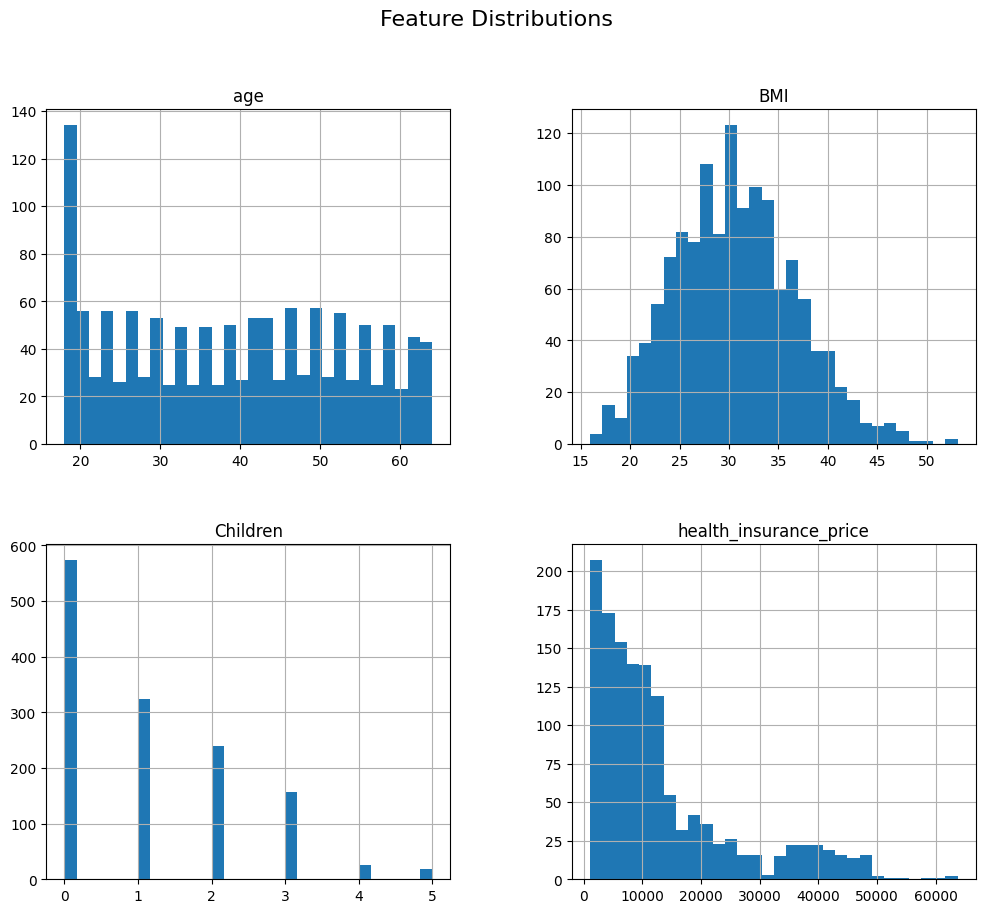

In [ ]:
# Distribution plots of numerical data --- Histogram
import matplotlib.pyplot as plt
df.hist(figsize=(12, 10), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# ***Count Plot***

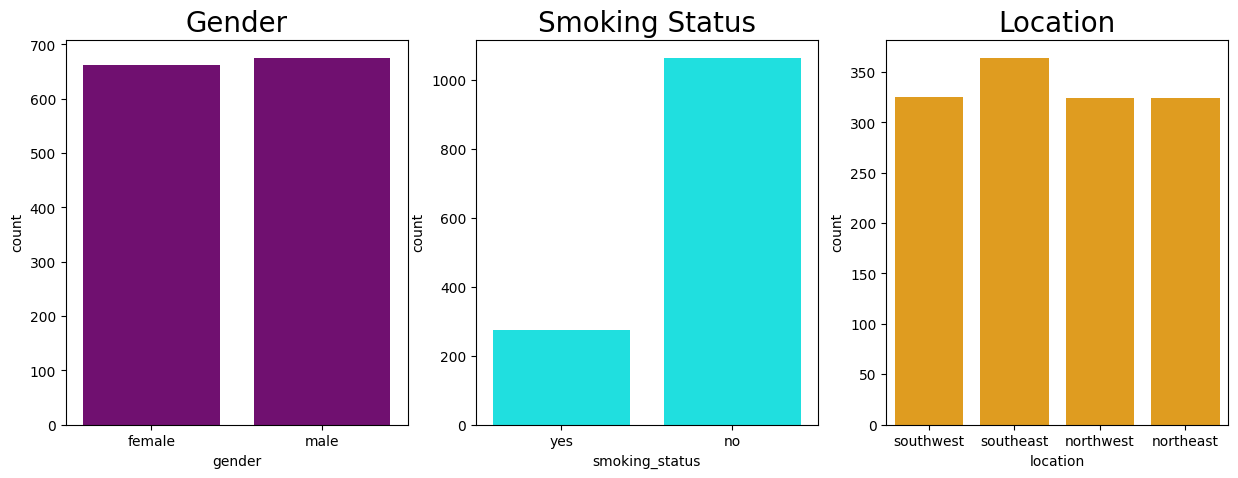

In [ ]:
# countplot for categorical data
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

sns.countplot(x='gender', data=df, ax=axes[0],color="purple")
axes[0].set_title('Gender',size = 20)


sns.countplot(x='smoking_status', data=df, ax=axes[1],color="cyan")
axes[1].set_title('Smoking Status',size = 20)


sns.countplot(x='location', data=df, ax=axes[2],color="orange")
axes[2].set_title('Location',size = 20)

plt.show()


In [ ]:
# count of missing values in the dataset
df.isnull().sum()

,0
age,28
gender,0
BMI,23
Children,0
smoking_status,0
location,0
health_insurance_price,2


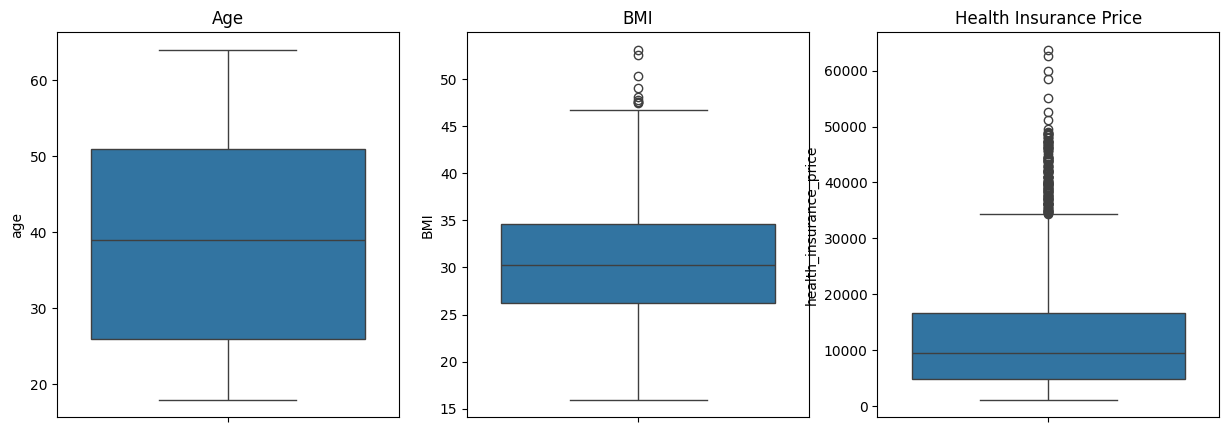

In [ ]:
# Boxplot --- used for checking outliers in tthe data
import seaborn as sns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

sns.boxplot(y=df['age'], ax=axes[0])
axes[0].set_title('Age')

sns.boxplot(y=df['BMI'], ax=axes[1])
axes[1].set_title('BMI')

sns.boxplot(y=df['health_insurance_price'], ax=axes[2])
axes[2].set_title('Health Insurance Price')
plt.show()

# **Data Prepocessing**

1. Handling of the duplicates
2. Handling of the duplicates
3. Outlier treatment
4. Feature Scaling



In [ ]:
# Handling the null values
# Mean -- No outliers in the age column
df['age'] = df['age'].fillna(df['age'].mean())
# replaced with median value as there are outliers in the BMI column
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['health_insurance_price'] = df['health_insurance_price'].fillna(df['health_insurance_price'].median())
df.isnull().sum()

,0
age,0
gender,0
BMI,0
Children,0
smoking_status,0
location,0
health_insurance_price,0


In [ ]:
# dtype conversion --- age(float) to age(int)
df['age'] = df['age'].astype("int32")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1337 non-null   int32  
 1   gender                  1337 non-null   object 
 2   BMI                     1337 non-null   float64
 3   Children                1337 non-null   int64  
 4   smoking_status          1337 non-null   object 
 5   location                1337 non-null   object 
 6   health_insurance_price  1337 non-null   float64
dtypes: float64(2), int32(1), int64(1), object(3)
memory usage: 78.3+ KB


In [ ]:
# checking for the quartile range ---- for extracting the outliers
df.describe()

,age,BMI,Children,health_insurance_price
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.178010,30.632521,1.095737,13271.417945
std,13.901698,6.059939,1.205571,12105.014743
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,4747.052900
50%,39.000000,30.305000,1.000000,9386.161300
75%,51.000000,34.430000,2.000000,16586.497710
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Handling the outliers with upperlimit value
IOR = df['health_insurance_price'].quantile(0.75) - df['health_insurance_price'].quantile(0.25)
print("IQR:",IOR)
Upper_limit = df['health_insurance_price'].quantile(0.75) + 1.5 * IOR
print("Upper_limit:",Upper_limit)
df.loc[df['health_insurance_price'] > Upper_limit, 'health_insurance_price'] = Upper_limit


IQR: 11839.44481
Upper_limit: 34345.664925000005


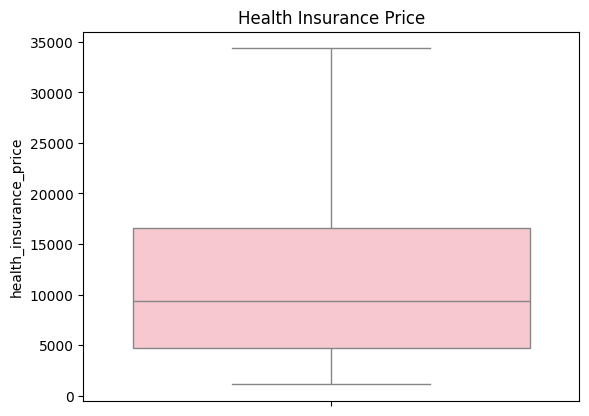

In [ ]:
# Visualizing data after removal of outliers
import seaborn as sns
sns.boxplot(y = df['health_insurance_price'],color = 'pink')
plt.title('Health Insurance Price')
plt.show()

In [ ]:
# Upper limit value
IOR = df['BMI'].quantile(0.75) - df['BMI'].quantile(0.25)
print("IQR:",IOR)
Upper_limit = df['BMI'].quantile(0.75) + 1.5 * IOR
print("Upper_limit:",Upper_limit)
df.loc[df['BMI'] > Upper_limit, 'BMI'] = Upper_limit

IQR: 8.114999999999998
Upper_limit: 46.6025


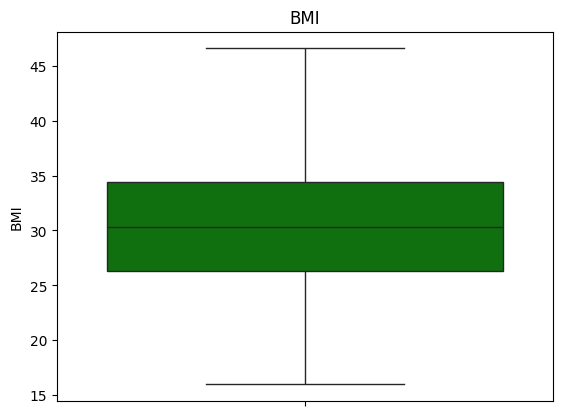

In [ ]:
# BMI -- after removing the outliers
sns.boxplot(y = df['BMI'],color = 'green')
plt.title('BMI')
plt.show()

b.	What feature engineering techniques will be relevant to your project?

1. Data wrangling -- convert the data from one format to another. This can be done in two ways :-

          * One hot-encoding

2.  Transformation -- convert the skewed data into normally distributed data.

         * Root transformation for right skewes data
         * Power transformation for left skewd data

3.   Feature scaling -- convert high magnitude values to low magnitude features

         * Standardization -- This technique would be relevant as after data preprocessing there are no outliers and the data should be normally distributed.

In [ ]:
# Normally distributed
df['age'].skew()

np.float64(0.057885015614954224)

In [ ]:
# Normally distributed
df['BMI'].skew()

np.float64(0.23831812031234312)

In [ ]:
# Right skewed
df['health_insurance_price'].skew()

np.float64(1.0807697742188844)

In [ ]:
# Normalising the right skewed data -- Root Transformation
df['health_insurance_price'] = df['health_insurance_price'] ** (1/2)
df['health_insurance_price'].skew()

np.float64(0.5231307690545223)

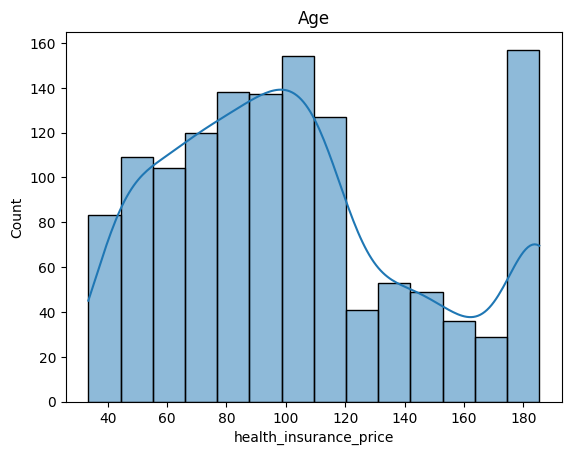

In [ ]:
# visualizing data after root transformation
sns.histplot(df['health_insurance_price'],kde=True)
plt.title('Age')
plt.show()

In [ ]:
# Encoding -- Nominal data
X = df[['gender', 'location', 'smoking_status']]
X = pd.get_dummies(X, columns=['gender', 'location', 'smoking_status'], drop_first=True, dtype=int)
print(X)


      gender_male  location_northwest  location_southeast  location_southwest  \
0               0                   0                   0                   1   
1               1                   0                   1                   0   
2               1                   0                   1                   0   
3               1                   1                   0                   0   
4               1                   1                   0                   0   
...           ...                 ...                 ...                 ...   
1333            1                   1                   0                   0   
1334            0                   0                   0                   0   
1335            0                   0                   1                   0   
1336            0                   0                   0                   1   
1337            0                   1                   0                   0   

      smoking_status_yes  


In [ ]:
# step: Feature Scaling -- standardscaler -- no outliers and the data is njormally distributed
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['age', 'BMI', 'health_insurance_price']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print("Mean value:",scaler.mean_)
print("Standard deviation value:",scaler.scale_)


Mean value: [ 39.17801047  30.6143362  102.8370581 ]
Standard deviation value: [13.89649831  6.00299991 43.46503229]


# ***Modelling Building***

**Machine Learning Approach**

a.	What method will you use for machine learning-based predictions of health.

* Since the output variable (health insurance price) is numerical, this is a supervised learning problem. I will use regression models like Linear Regression, Decision Tree, and Random Forest. The data will be split into 80% for training and 20% for testing. After building the models, I will evaluate their accuracy using metrics such as MAE, MSE, and R² to determine the best-performing model.

In [ ]:
# Modelling

# Input variables
x = df[['age', 'gender', 'BMI', 'Children', 'smoking_status', 'location']]
x = pd.get_dummies(x, columns=['gender', 'location', 'smoking_status'], drop_first=True, dtype=int) # one-hot encoding into the categorical columns

# Output variables
y = df['health_insurance_price']

In [ ]:
# Data Split -- Train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=True)

# REGRESSION MODEL




***Linear Regression***

---



In [ ]:
# Step 1: Import of the Model
from sklearn.linear_model import LinearRegression
# Step 2: Call the Algorithm
model = LinearRegression()
# Step 3: Fit the Model and Train the Model with Train Data
model.fit(x_train, y_train)


LinearRegression()

In [ ]:
# Step 5: Predict on the test data
y = model.predict(x_test)

In [ ]:
# Model Evaluation Metrics with Linear regression algorithm
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
print("Mean Absolute Error:",mean_absolute_error(y_test,y))
print("Mean Squared Error:",mean_squared_error(y_test,y))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,y)))
print("R2 Score:",r2_score(y_test,y))


Mean Absolute Error: 0.3148280442915229
Mean Squared Error: 0.22536803406066797
Root Mean Squared Error: 0.4747294324777725
R2 Score: 0.7551367208668271


***Decision Tree***

---



In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
y = model.predict(x_test)

In [ ]:
# Model Evaluation Metrics with Decision Tree Algorithm
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
print("Mean Absolute Error:",mean_absolute_error(y_test,y))
print("Mean Squared Error:",mean_squared_error(y_test,y))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,y)))
print("R2 Score:",r2_score(y_test,y))

Mean Absolute Error: 0.3081230579423277
Mean Squared Error: 0.4208916567340531
Root Mean Squared Error: 0.648761633216741
R2 Score: 0.5426995152296064


***Random Forest***

---



In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
y = model.predict(x_test)

In [ ]:
# Model Evaluation Metrics with Random Forest algorithm
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
print("Mean Absolute Error:",mean_absolute_error(y_test,y))
print("Mean Squared Error:",mean_squared_error(y_test,y))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,y)))
print("R2 Score:",r2_score(y_test,y))

Mean Absolute Error: 0.25981591631276113
Mean Squared Error: 0.22329603768090867
Root Mean Squared Error: 0.472542101490342
R2 Score: 0.7573879533009857


***XGBRegressor***

---



In [ ]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y = model.predict(x_test)

In [ ]:
# Model Evaluation Metrics with XGBregreesor algorithm
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
print("Mean Absolute Error:",mean_absolute_error(y_test,y))
print("Mean Squared Error:",mean_squared_error(y_test,y))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,y)))
print("R2 Score:",r2_score(y_test,y))

Mean Absolute Error: 0.2893508982920859
Mean Squared Error: 0.2624992977963406
Root Mean Squared Error: 0.5123468530169192
R2 Score: 0.7147934528671251


#Justication of the appropriate model

***“I tested multiple algorithms (Linear Regression, Decision Tree, Random Forest, XGBoost) and found that Random Forest and XGBoost provided the lowest MAE and similar R² as Linear Regression. I selected XGBoost/Random Forest as my final model for its balance between low prediction error and variance explanation.”***